# Importing Necessary Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

# Loading the MNIST Dataset

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#  Preprocessing the Data

In [ ]:
x_train = x_train.astype('float32') / 255  
x_test = x_test.astype('float32') / 255

In [ ]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Building the Neural Network Model

In [ ]:
model = Sequential([
    Flatten(input_shape=(28, 28)),  
    Dense(128, activation='relu'),  
    Dense(64, activation='relu'),   
    Dense(10, activation='softmax') 
])

In [6]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [7]:
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8786 - loss: 0.4261 - val_accuracy: 0.9618 - val_loss: 0.1218
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9674 - loss: 0.1055 - val_accuracy: 0.9702 - val_loss: 0.0971
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9798 - loss: 0.0685 - val_accuracy: 0.9701 - val_loss: 0.0958
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9834 - loss: 0.0529 - val_accuracy: 0.9783 - val_loss: 0.0730
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9876 - loss: 0.0391 - val_accuracy: 0.9742 - val_loss: 0.0847


# Evaluating the Model

In [13]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9694 - loss: 0.0941
Test accuracy: 0.9742000102996826


In [14]:
def predict_digit(image):
    # Preprocess the image
    image = image.astype('float32') / 255
    image = np.expand_dims(image, axis=0)  
    
    # Predict the digit
    prediction = model.predict(image)
    return np.argmax(prediction)


# Predicting a Single Digit

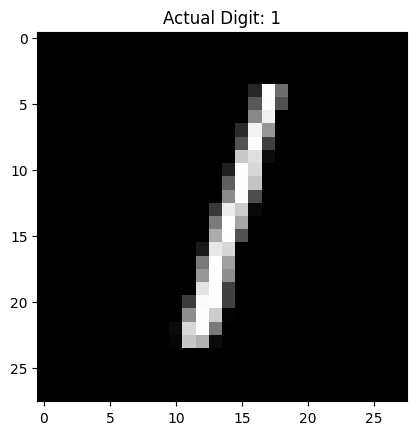

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Predicted Digit for index 2: 5


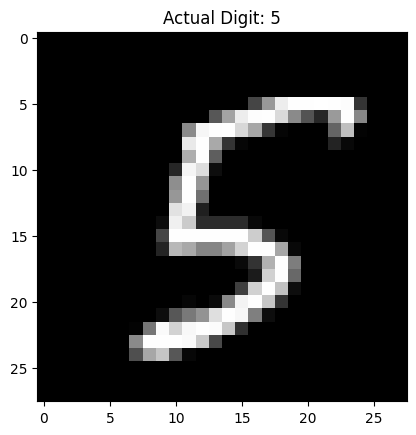

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Predicted Digit for index 23: 5


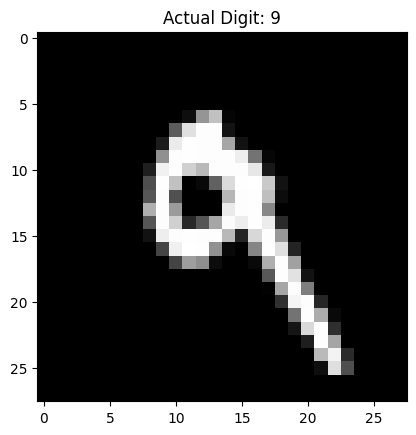

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Predicted Digit for index 7: 5


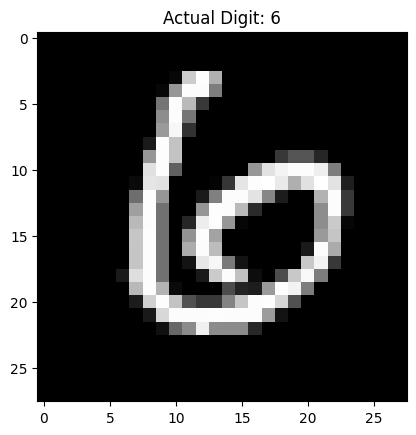

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Predicted Digit for index 11: 5


In [24]:
indices = [2, 23, 7, 11]  # List of indices for multiple images

# Loop through the indices and predict digits
for index in indices:
    test_image = x_test[index]

    # Show the image
    plt.imshow(test_image, cmap='gray')
    plt.title(f"Actual Digit: {np.argmax(y_test[index])}")
    plt.show()

    # Predict the digit
    predicted_digit = predict_digit(test_image)
    print(f"Predicted Digit for index {index}: {predicted_digit}")